## Actividad 11. Análisis de componentes y mapas autoorganizados.

Se presenta a continuación el desarrollo de la actividad 11.

1. Usando la herramienta de grabación de tu teléfono móvil, captura un breve mensaje (de 15 a 20 segundos) en el que digas tu nombre, así como la fecha y el lugar en donde te encuentras. Repite esta misma operación varias veces y en diversos lugares. Busca un lugar en donde la señal grabada se pueda contaminar fácilmente con ruido (cerca de una avenida, música de fondo, ruidos mecánicos, lluvia, entre otros).

1. Utilizando los conocimientos sobre el análisis de componentes, elabora un modelo de aprendizaje automático que pueda filtrar la señal de entrada y separar el mensaje (sonido de la voz) del ruido de fondo. Realiza las pruebas necesarias para evaluar la calidad de tu modelo.

1. Con las muestras de ruido obtenidas después de ejecutar el paso 2, construye y entrena un mapa autoorganizado de características que permita determinar a qué grupo pertenece y, por ende, te facilite determinar en qué lugar se realizó la captura original. Toma en cuenta que debes preprocesar dichas señales para que puedan usarse por la red neuronal. Realiza las pruebas necesarias para evaluar la calidad de tu modelo.

1. Agrupa ambos modelos en un solo programa de Python, genera nuevas muestras en condiciones parecidas a las originales y evalúa el funcionamiento completo de tu propuesta. ¿Los resultados fueron los adecuados?

In [6]:
#Importando librerías necesarias
import numpy as np
from scipy.io import wavfile
import wave
from sklearn.decomposition import FastICA
from matplotlib import pyplot as plt
import pandas as pd

**Iniciando con los archivos correspondientes al ruido de la calle**
- Se repetirá el mismo proceso para archivos de fiesta infantil y lluvia

In [ ]:
#Descargando archivos de audio a procesar que estan compartidos en google drive y los guarda en el almacenamiento local del notebook
!gdown 1Mb0GD_UjcBYXD0PSzQquKTm3Acc306NQ #Descarga el archivo Calle1.wav
!gdown 1txB8avxayKzirc8rI2X-mYYfRYFSWiuB #Descarga el archivo Calle2.wav
!gdown 1NGze2KJ9PbWyMbw-dH3nEWUMhMYYLaJs #Descarga el archivo Calle3.wav
!gdown 1DauUSFWriHosDfZwCO8-rgjh_zJMzLgp #Descarga el archivo VozCalle.wav

Downloading...
From: https://drive.google.com/uc?id=1Mb0GD_UjcBYXD0PSzQquKTm3Acc306NQ
To: /content/Calle1.wav
100% 1.32M/1.32M [00:00<00:00, 54.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1txB8avxayKzirc8rI2X-mYYfRYFSWiuB
To: /content/Calle2.wav
100% 1.32M/1.32M [00:00<00:00, 74.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NGze2KJ9PbWyMbw-dH3nEWUMhMYYLaJs
To: /content/Calle3.wav
100% 1.32M/1.32M [00:00<00:00, 62.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DauUSFWriHosDfZwCO8-rgjh_zJMzLgp
To: /content/VozCalle.wav
100% 1.32M/1.32M [00:00<00:00, 125MB/s]


In [ ]:
#Obteniendo la información de los archivos de audio
file1 = wave.open('Calle1.wav')
file2 = wave.open('Calle2.wav')
file3 = wave.open('Calle3.wav')
file4 = wave.open('VozCalle.wav')

In [ ]:
#Mostrando las características de cada archivo
print(f"Parámetros archivo 1: {file1.getparams()}\nParámetros archivo 2: {file2.getparams()}\nParámetros archivo 3: {file4.getparams()}\nParámetros archivo 4: {file4.getparams()}")
print(f"La duración del audio es: {file1.getnframes()/file1.getframerate()}")

Parámetros archivo 1: _wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=661500, comptype='NONE', compname='not compressed')
Parámetros archivo 2: _wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=661500, comptype='NONE', compname='not compressed')
Parámetros archivo 3: _wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=661500, comptype='NONE', compname='not compressed')
Parámetros archivo 4: _wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=661500, comptype='NONE', compname='not compressed')
La duración del audio es: 15.0


In [ ]:
#Extrayendo los frames de los archivos para usarlos en el dataset
signal_1_raw = file1.readframes(-1)
signal_1 = np.frombuffer(signal_1_raw, 'int16')
signal_2_raw = file2.readframes(-1)
signal_2 = np.frombuffer(signal_2_raw, 'int16')
signal_3_raw = file3.readframes(-1)
signal_3 = np.frombuffer(signal_3_raw, 'int16')
signal_4_raw = file4.readframes(-1)
signal_4 = np.frombuffer(signal_4_raw, 'int16')

In [ ]:
#Obteniendo el samplig rate y la duración
sampling_rate = file1.getframerate()
duracion = np.linspace(0, len(signal_1)/sampling_rate, num=len(signal_1))

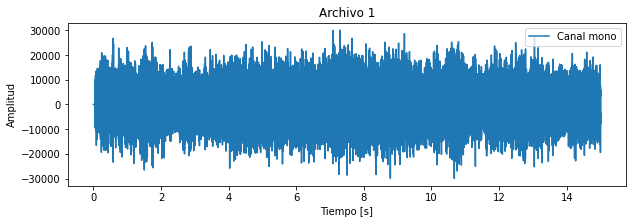

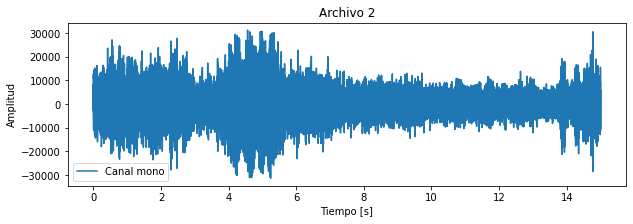

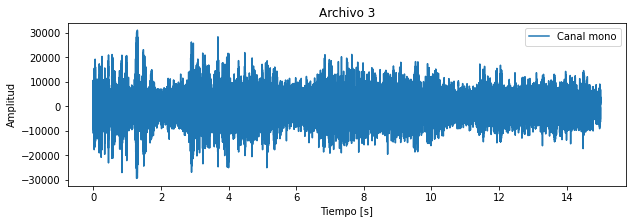

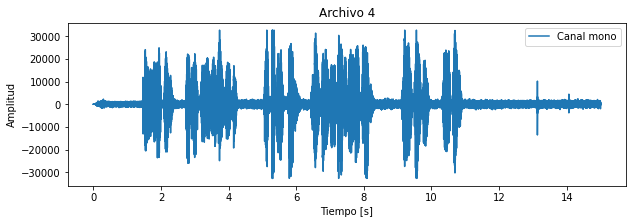

In [ ]:
#Realizando la gráfica de los archivos importados ya procesados para ser usados en el modelo fast ica
plt.plot(duracion, signal_1, label="Canal mono")
plt.rcParams["figure.figsize"] = (10, 3)
plt.legend()
plt.title('Archivo 1')
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.show()
plt.plot(duracion, signal_2, label="Canal mono")
plt.rcParams["figure.figsize"] = (10, 3)
plt.legend()
plt.title('Archivo 2')
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.show()
plt.plot(duracion, signal_3, label="Canal mono")
plt.rcParams["figure.figsize"] = (10, 3)
plt.legend()
plt.title('Archivo 3')
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.show()
plt.plot(duracion, signal_4, label="Canal mono")
plt.rcParams["figure.figsize"] = (10, 3)
plt.legend()
plt.title('Archivo 4')
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.show()

In [ ]:
#Mezclando las fuentes de datos
S = np.c_[signal_1, signal_2, signal_3, signal_4]

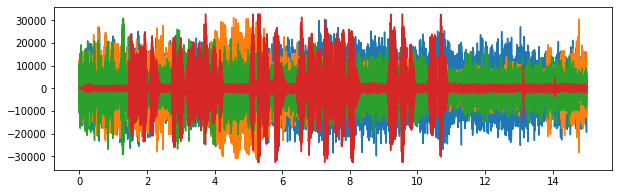

In [ ]:
#Graficando la fuente mezclada
plt.plot(duracion, S)
plt.show()

In [ ]:
#Imprimiendo la forma mezclada
print(S.shape)

(661500, 4)


In [ ]:
#Normalizando los datos
S = S/S.std(axis=0)

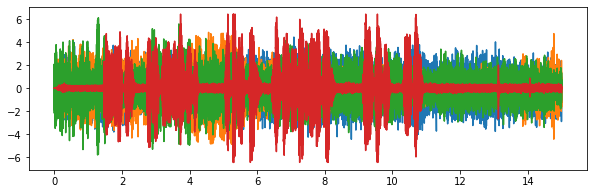

In [ ]:
#Imprimiendo datos normalizados
plt.plot(duracion, S)
plt.show()

In [ ]:
#Creando la matriz aleatoria inicial, en este caso al ser 4 fuentes será 4x4 y validando que tenga inversa
A = np.array([[3,2, 0.5,6], [9, 12, 4, 7], [0.9, 1, 2, 1], [0.2, 10, 3, 8]])
print(A)
print(f'El determinante de esta matriz aleatoria es: {np.linalg.det(A)}')

[[ 3.   2.   0.5  6. ]
 [ 9.  12.   4.   7. ]
 [ 0.9  1.   2.   1. ]
 [ 0.2 10.   3.   8. ]]
El determinante de esta matris aleatoria es: 776.9999999999999


In [ ]:
#Obteniendo el arreglo de datos inicial usando esta matriz aleatoria
X= np.dot(S, A.T)

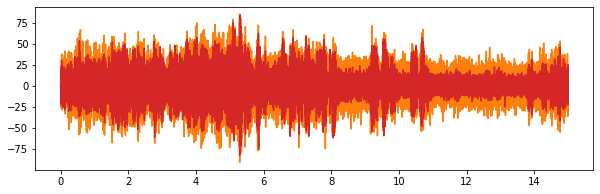

In [ ]:
#Graficando este nuevo resultado
plt.plot(duracion, X)
plt.show()

In [ ]:
#Recuperando las señales
ica = FastICA(n_components=4)
S_ = ica.fit_transform(X)
A_ = ica.mixing_

In [ ]:
#Imprimiendo el mixing
A_

array([[  420.93724789, -2414.5736183 , -1635.38533417, -4883.07988241],
       [ 3206.99393972, -7223.09839962, -9770.25676419, -5688.56375629],
       [ 1624.45725183,  -687.44936948,  -822.6909975 ,  -818.78708641],
       [ 2308.37285001,   -84.19645247, -8165.26261388, -6479.73809584]])

Graficando los componentes resultantes

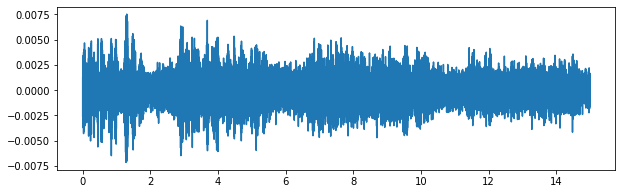

In [ ]:
#Primer componente
plt.plot(duracion, S_[:, 0])
plt.show()

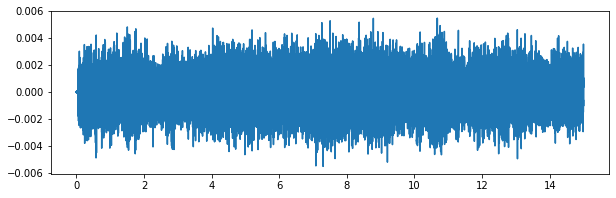

In [ ]:
#Segundo componente
plt.plot(duracion, S_[:, 1])
plt.show()

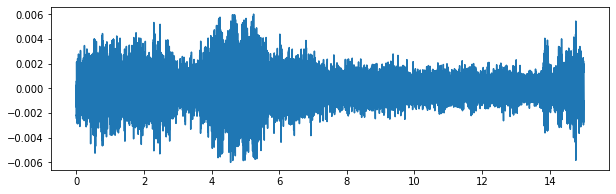

In [ ]:
#Tercer componente
plt.plot(duracion, S_[:, 2])
plt.show()

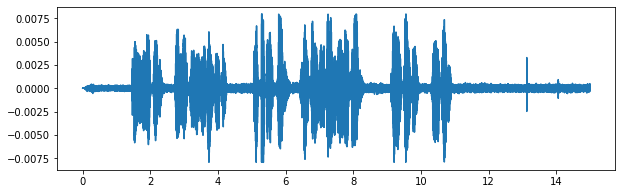

In [ ]:
#Cuarto componente
plt.plot(duracion, S_[:, 3])
plt.show()

In [ ]:
#Incrementando el volumen de las señales para que puedan ser escuchadas cuando se guarden en archivos como audio de 16 bit
#Este rango está entre -32768 y 32767 por lo que se multiplicaran las fuentes por este último valor y se les multiplicará
#100 para subirles el volumen
rs1_int = np.int16(S_[:, 0]*32767*100)
rs2_int = np.int16(S_[:, 1]*32767*100)
rs3_int = np.int16(S_[:, 2]*32767*100)
rs4_int = np.int16(S_[:, 3]*32767*100)

In [ ]:
#Guardando los nuevos archivos de audio separados con los canales recuperados.
wavfile.write('result1_Calle.wav', sampling_rate, rs1_int)
wavfile.write('result2_Calle.wav', sampling_rate, rs2_int)
wavfile.write('result3_Calle.wav', sampling_rate, rs3_int)
wavfile.write('result4_Calle.wav', sampling_rate, rs4_int)

**Nota**
- Al escuchar los archivos resultantes guardados notamos que el que corresponde a la voz es el archivo 4 por lo que se usaran el 1, 2 y 3 en el caso de la calle para el proceso del mapa autoorganizado.
- Se hace notar que estos archivos se van a guardar y cargar desde un compartido de google drive ya que este proceso no necesariamente siempre va a dejar el canal de la voz en el 3 entonces para mantener la consistencia de la actividad se tomaran los resultados obtenidos durante la creación del mismo.

**Obteniendo los archivos de fiesta**
- Se menciona que en este caso y los siguientes se omitirá la generación de gráficas, ya que el proceso será muy similar y para efectos de no extender mucho la longitud del notebook se mostrarán solo los resultados de estos nuevos procesos.

In [ ]:
#Descargando archivos de audio de fiesta infantil a procesar que estan compartidos en google drive y los guarda en el almacenamiento local del notebook
!gdown 1noVxK_NyGgT5zWCHkyuw__rEtxGs-g-u #Descarga el archivo Fiesta1.wav
!gdown 1H8ou2Jw-v3NzwRbAySjA8l2AIUnOyTYv #Descarga el archivo FIesta2.wav
!gdown 1pRmeogIALyYZF8u3exUW7qJZ3fxBKX_e #Descarga el archivo Fiesta3.wav
!gdown 1d-n5iBGpRy_YzOoSpqPBfe5FXIK1V1E4 #Descarga el archivo VozFiestaInfantil.wav

Downloading...
From: https://drive.google.com/uc?id=1noVxK_NyGgT5zWCHkyuw__rEtxGs-g-u
To: /content/Fiesta1.wav
100% 1.32M/1.32M [00:00<00:00, 130MB/s]
Downloading...
From: https://drive.google.com/uc?id=1H8ou2Jw-v3NzwRbAySjA8l2AIUnOyTYv
To: /content/Fiesta2.wav
100% 1.32M/1.32M [00:00<00:00, 129MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pRmeogIALyYZF8u3exUW7qJZ3fxBKX_e
To: /content/Fiesta3.wav
100% 1.32M/1.32M [00:00<00:00, 71.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1d-n5iBGpRy_YzOoSpqPBfe5FXIK1V1E4
To: /content/VozFiestaInfantil.wav
100% 1.32M/1.32M [00:00<00:00, 137MB/s]


In [ ]:
#Obteniendo la información de los archivos de audio
fileFiesta1 = wave.open('Fiesta1.wav')
fileFiesta2 = wave.open('Fiesta2.wav')
fileFiesta3 = wave.open('Fiesta3.wav')
fileFiesta4 = wave.open('VozFiestaInfantil.wav')

In [ ]:
#Mostrando las características de cada archivo
print(f"Parámetros archivo 1: {fileFiesta1.getparams()}\nParámetros archivo 2: {fileFiesta2.getparams()}\nParámetros archivo 3: {fileFiesta3.getparams()}\nParámetros archivo 4: {fileFiesta4.getparams()}")
print(f"La duración del audio es: {fileFiesta1.getnframes()/fileFiesta1.getframerate()}")

Parámetros archivo 1: _wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=661500, comptype='NONE', compname='not compressed')
Parámetros archivo 2: _wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=661500, comptype='NONE', compname='not compressed')
Parámetros archivo 3: _wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=661500, comptype='NONE', compname='not compressed')
Parámetros archivo 4: _wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=661500, comptype='NONE', compname='not compressed')
La duración del audio es: 15.0


In [ ]:
#Extrayendo los frames de los archivos para usarlos en el dataset
signalFiesta_1_raw = fileFiesta1.readframes(-1)
signalFiesta_1 = np.frombuffer(signalFiesta_1_raw, 'int16')
signalFiesta_2_raw = fileFiesta2.readframes(-1)
signalFiesta_2 = np.frombuffer(signalFiesta_2_raw, 'int16')
signalFiesta_3_raw = fileFiesta3.readframes(-1)
signalFiesta_3 = np.frombuffer(signalFiesta_3_raw, 'int16')
signalFiesta_4_raw = fileFiesta4.readframes(-1)
signalFiesta_4 = np.frombuffer(signalFiesta_4_raw, 'int16')

In [ ]:
#Obteniendo el samplig rate y la duración
sampling_rate_fiesta = fileFiesta1.getframerate()
duracion_fiesta = np.linspace(0, len(signalFiesta_1)/sampling_rate, num=len(signalFiesta_1))

In [ ]:
#Mezclando las fuentes de datos
S_fiesta = np.c_[signalFiesta_1, signalFiesta_2, signalFiesta_3, signalFiesta_4]

In [ ]:
#Imprimiendo la forma mezclada
print(S_fiesta.shape)

(661500, 4)


In [ ]:
#Normalizando los datos
S_fiesta = S_fiesta/S_fiesta.std(axis=0)

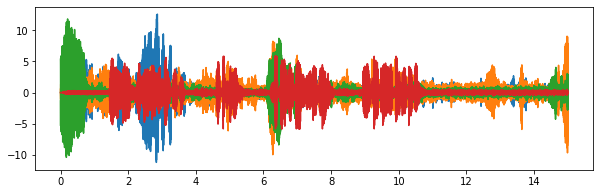

In [ ]:
#Imprimiendo datos normalizados
plt.plot(duracion_fiesta, S_fiesta)
plt.show()

In [ ]:
#Creando la matriz aleatoria inicial, en este caso al ser 4 fuentes será 4x4 y validando que tenga inversa
A_fiesta = np.array([[9, 0.1, 2, 4], [10, 6, 0.6, 12], [2, 7, 11, 0.5], [16, 5, 2, 8]])
print(A_fiesta)
print(f'El determinante de esta matriz aleatoria es: {np.linalg.det(A_fiesta)}')

[[ 9.   0.1  2.   4. ]
 [10.   6.   0.6 12. ]
 [ 2.   7.  11.   0.5]
 [16.   5.   2.   8. ]]
El determinante de esta matriz aleatoria es: -3616.2199999999984


In [ ]:
#Obteniendo el arreglo de datos inicial usando esta matriz aleatoria
X_fiesta= np.dot(S_fiesta, A_fiesta.T)

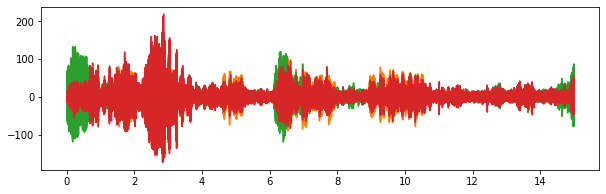

In [ ]:
#Graficando este nuevo resultado
plt.plot(duracion, X_fiesta)
plt.show()

In [ ]:
#Recuperando las señales
ica_fiesta = FastICA(n_components=4)
S_fiesta_ = ica_fiesta.fit_transform(X_fiesta)
A_fiesta_ = ica_fiesta.mixing_

In [ ]:
#Imprimiendo el mixing
A_fiesta_

array([[  7318.41031618,   3247.14743796,  -1050.56982563,
         -1255.00417657],
       [  8112.44615461,   9740.42304722,   3238.56055399,
         -3745.9074685 ],
       [  1607.5691139 ,    414.1064679 ,  -2035.82238579,
        -10394.42262009],
       [ 12996.62317293,   6484.89918844,   1855.43722419,
         -4013.14187655]])

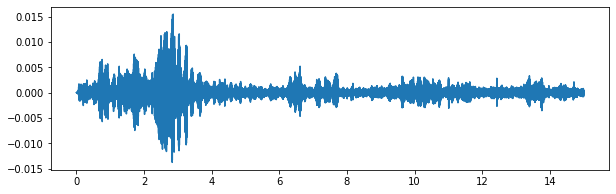

In [ ]:
#Primer componente
plt.plot(duracion, S_fiesta_[:, 0])
plt.show()

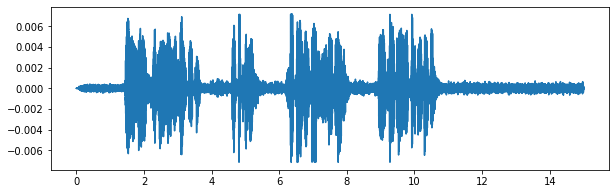

In [ ]:
#Segundo componente
plt.plot(duracion, S_fiesta_[:, 1])
plt.show()

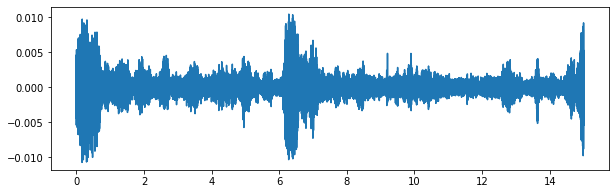

In [ ]:
#Tercer componente
plt.plot(duracion, S_fiesta_[:, 2])
plt.show()

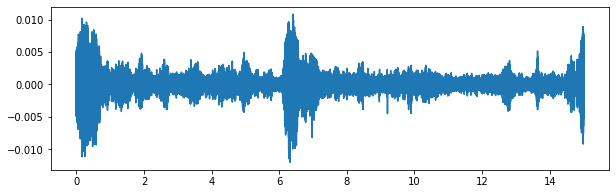

In [ ]:
#Cuarto componente
plt.plot(duracion, S_fiesta_[:, 3])
plt.show()

In [ ]:
#Incrementando el volumen de las señales para que puedan ser escuchadas cuando se guarden en archivos como audio de 16 bit
#Este rango está entre -32768 y 32767 por lo que se multiplicaran las fuentes por este último valor y se les multiplicará
#100 para subirles el volumen
rs1_fiesta_int = np.int16(S_fiesta_[:, 0]*32767*100)
rs2_fiesta_int = np.int16(S_fiesta_[:, 1]*32767*100)
rs3_fiesta_int = np.int16(S_fiesta_[:, 2]*32767*100)
rs4_fiesta_int = np.int16(S_fiesta_[:, 3]*32767*100)

In [ ]:
#Guardando los nuevos archivos de audio separados con los canales recuperados.
wavfile.write('result1_Fiesta.wav', sampling_rate, rs1_fiesta_int)
wavfile.write('result2_Fiesta.wav', sampling_rate, rs2_fiesta_int)
wavfile.write('result3_Fiesta.wav', sampling_rate, rs3_fiesta_int)
wavfile.write('result4_Fiesta.wav', sampling_rate, rs4_fiesta_int)

**Nota**
- Al escuchar los resultados de los componentes guardados notamos que la voz se encuentra en el segundo componente por lo que en este caso se usarán los componentes 1, 3 y 4 para la parte del mapa autoorganizado.
- De la misma forma que con la parte del ruido de la calle para el mapa se tomaran los archivos guardados resultantes compartidos desde google drive ya que no se asegura que siempre la voz quede en el segundo componente en cada ejecución.

**Procesando los archivos con lluvia**
- Al igual que en el caso de los archivos de fiesta al ser procesos similares se omitiran la mayoría de las gráficas y se mostrarán las más relevantes conforme se avance en los pasos.

In [ ]:
#Descargando archivos de audio de lluvia a procesar que estan compartidos en google drive y los guarda en el almacenamiento local del notebook
!gdown 1hMDr4sJMSTA1H04iCt9MI9IjTAMIkhUe #Descarga el archivo Lluvia1.wav
!gdown 1lsaq17GxGemm5Oo6kn9cvEZqZqP19748 #Descarga el archivo Lluvia2.wav
!gdown 1AdLDjKwfMaeV_AIQUsSZVMq5QbZEwy8A #Descarga el archivo Lluvia3.wav
!gdown 1PFCLZBpymdHoHOIYvPSIrv8ycQa8P6sP #Descarga el archivo VozLluvia.wav

Downloading...
From: https://drive.google.com/uc?id=1hMDr4sJMSTA1H04iCt9MI9IjTAMIkhUe
To: /content/Lluvia1.wav
100% 1.32M/1.32M [00:00<00:00, 147MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lsaq17GxGemm5Oo6kn9cvEZqZqP19748
To: /content/Lluvia2.wav
100% 1.32M/1.32M [00:00<00:00, 123MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AdLDjKwfMaeV_AIQUsSZVMq5QbZEwy8A
To: /content/Lluvia3.wav
100% 1.32M/1.32M [00:00<00:00, 141MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PFCLZBpymdHoHOIYvPSIrv8ycQa8P6sP
To: /content/VozLluvia.wav
100% 1.32M/1.32M [00:00<00:00, 132MB/s]


In [ ]:
#Obteniendo la información de los archivos de audio
fileLluvia1 = wave.open('Lluvia1.wav')
fileLluvia2 = wave.open('Lluvia2.wav')
fileLluvia3 = wave.open('Lluvia3.wav')
fileLluvia4 = wave.open('VozLluvia.wav')

In [ ]:
#Mostrando las características de cada archivo
print(f"Parámetros archivo 1: {fileLluvia1.getparams()}\nParámetros archivo 2: {fileLluvia2.getparams()}\nParámetros archivo 3: {fileLluvia3.getparams()}\nParámetros archivo 4: {fileLluvia4.getparams()}")
print(f"La duración del audio es: {fileLluvia1.getnframes()/fileLluvia1.getframerate()}")

Parámetros archivo 1: _wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=661500, comptype='NONE', compname='not compressed')
Parámetros archivo 2: _wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=661500, comptype='NONE', compname='not compressed')
Parámetros archivo 3: _wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=661500, comptype='NONE', compname='not compressed')
Parámetros archivo 4: _wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=661500, comptype='NONE', compname='not compressed')
La duración del audio es: 15.0


In [ ]:
#Extrayendo los frames de los archivos para usarlos en el dataset
signalLluvia_1_raw = fileLluvia1.readframes(-1)
signalLluvia_1 = np.frombuffer(signalLluvia_1_raw, 'int16')
signalLluvia_2_raw = fileLluvia2.readframes(-1)
signalLluvia_2 = np.frombuffer(signalLluvia_2_raw, 'int16')
signalLluvia_3_raw = fileLluvia3.readframes(-1)
signalLluvia_3 = np.frombuffer(signalLluvia_3_raw, 'int16')
signalLluvia_4_raw = fileLluvia4.readframes(-1)
signalLluvia_4 = np.frombuffer(signalLluvia_4_raw, 'int16')

In [ ]:
#Obteniendo el samplig rate y la duración
sampling_rate_lluvia = fileLluvia1.getframerate()
duracion_lluvia = np.linspace(0, len(signalLluvia_1)/sampling_rate, num=len(signalLluvia_1))

In [ ]:
#Mezclando las fuentes de datos
S_lluvia = np.c_[signalLluvia_1, signalLluvia_2, signalLluvia_3, signalLluvia_4]

In [ ]:
#Imprimiendo la forma mezclada
print(S_lluvia.shape)

(661500, 4)


In [ ]:
#Normalizando los datos
S_lluvia = S_lluvia/S_lluvia.std(axis=0)

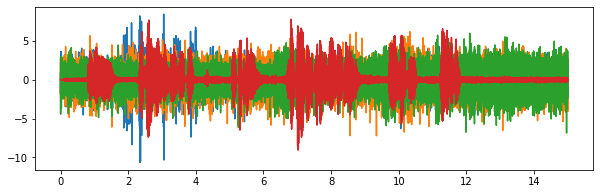

In [ ]:
#Imprimiendo datos normalizados
plt.plot(duracion_lluvia, S_lluvia)
plt.show()

In [ ]:
#Creando la matriz aleatoria inicial, en este caso al ser 4 fuentes será 4x4 y validando que tenga inversa
A_lluvia = np.array([[6, 2, 4, 1], [9, 12, 7, 9], [0.7, 2, 7, 4], [12, 0.6, 11, 8]])
print(A_lluvia)
print(f'El determinante de esta matriz aleatoria es: {np.linalg.det(A_lluvia)}')

[[ 6.   2.   4.   1. ]
 [ 9.  12.   7.   9. ]
 [ 0.7  2.   7.   4. ]
 [12.   0.6 11.   8. ]]
El determinante de esta matriz aleatoria es: 2582.9800000000005


In [ ]:
#Obteniendo el arreglo de datos inicial usando esta matriz aleatoria
X_lluvia= np.dot(S_lluvia, A_lluvia.T)

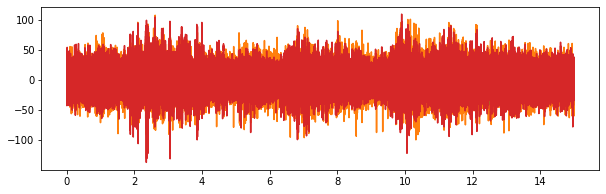

In [ ]:
#Graficando este nuevo resultado
plt.plot(duracion, X_lluvia)
plt.show()

In [ ]:
#Recuperando las señales
ica_lluvia = FastICA(n_components=4)
S_lluvia_ = ica_lluvia.fit_transform(X_lluvia)
A_lluvia_ = ica_lluvia.mixing_

In [ ]:
#Imprimiendo el mixing
A_lluvia_

array([[ 3212.87663028,  4860.01700099,   802.85431994, -1714.67286717],
       [ 5542.49550997,  7203.02896154,  7368.18929387, -9910.01262309],
       [ 5670.1604659 ,   545.68352996,  3164.58903651, -1708.76733455],
       [ 8901.51379636,  9742.39367548,  6408.16359958,  -702.86277281]])

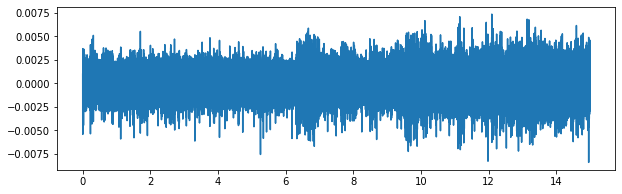

In [ ]:
#Primer componente
plt.plot(duracion, S_lluvia_[:, 0])
plt.show()

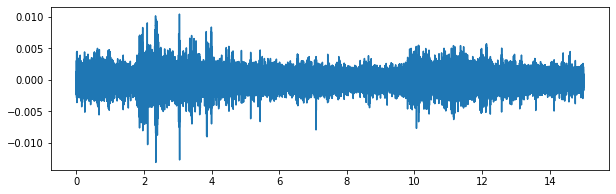

In [ ]:
#Segundo componente
plt.plot(duracion, S_lluvia_[:, 1])
plt.show()

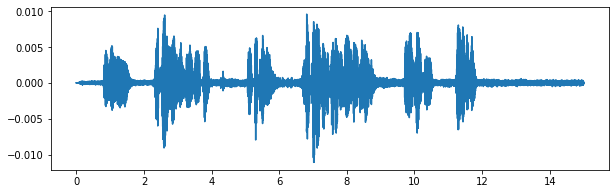

In [ ]:
#Tercer componente
plt.plot(duracion, S_lluvia_[:, 2])
plt.show()

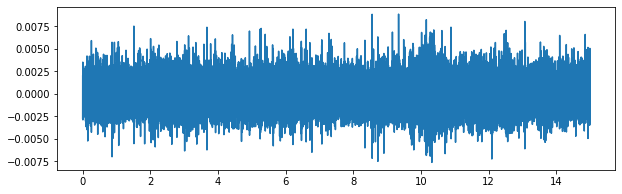

In [ ]:
#Cuarto componente
plt.plot(duracion, S_lluvia_[:, 3])
plt.show()

In [ ]:
#Incrementando el volumen de las señales para que puedan ser escuchadas cuando se guarden en archivos como audio de 16 bit
#Este rango está entre -32768 y 32767 por lo que se multiplicaran las fuentes por este último valor y se les multiplicará
#100 para subirles el volumen
rs1_lluvia_int = np.int16(S_lluvia_[:, 0]*32767*100)
rs2_lluvia_int = np.int16(S_lluvia_[:, 1]*32767*100)
rs3_lluvia_int = np.int16(S_lluvia_[:, 2]*32767*100)
rs4_lluvia_int = np.int16(S_lluvia_[:, 3]*32767*100)

In [ ]:
#Guardando los nuevos archivos de audio separados con los canales recuperados.
wavfile.write('result1_Lluvia.wav', sampling_rate, rs1_lluvia_int)
wavfile.write('result2_Lluvia.wav', sampling_rate, rs2_lluvia_int)
wavfile.write('result3_Lluvia.wav', sampling_rate, rs3_lluvia_int)
wavfile.write('result4_Lluvia.wav', sampling_rate, rs4_lluvia_int)

**Nota**
- Al escuchar los resultados de los componentes guardados notamos que la voz se encuentra en el tercer componente por lo que en este caso se usarán los componentes 1, 2 y 4 para la parte del mapa autoorganizado.
- De la misma forma que con la parte del ruido de la calle y fiesta para el mapa se tomaran los archivos guardados resultantes compartidos desde google drive ya que no se asegura que siempre la voz quede en el tercer componente en cada ejecución.

# **Generación del mapa autoorganizado**
- Para la generación de este mapa se utilizarán los archivos obtenidos en el flujo anterior que se describen a continuación.
- Para ruido de calle se usarán los resultados 1, 2 y 3 en la ejecución realizada al momento de la creación de este notebook que ya están almacenados y compartidos en google drive.
- Para el ruido de fiesta se usaran los resultados de este proceso 1, 3 y 4.
- Para el ruido de lluvia se usarán los resultados 1, 2 y 4.



In [2]:
#Importando los archivos de audio compartidos desde google drive para estas muestras que serán ára entrenamiento
!gdown 1K3FYcZN0KHO3LrQE0g7_nOZyagShCPK5 #Descarga el archivo result1_Calle.wav
!gdown 1EKgx5TktbMdH1-mc3KoHawUtJ4BWULoq #Descarga el archivo result2_Calle.wav
!gdown 1WLg8hpV6kPNsvgttIXpalBfPo8fOftQX #Descarga el archivo result3_Calle.wav
!gdown 1WDjHYi-QrdpNYJ8yMoMyg19EZaISFpTZ #Descarga el archivo result1_Fiesta.wav
!gdown 1P8ikFKmSOwjKIwykmWqYvO_oPD2hNnSy #Descarga el archivo result3_Fiesta.wav
!gdown 1R-DI6llZmlfo1ioWSkPER_baDZ3NUleg #Descarga el archivo result4_Fiesta.wav
!gdown 1uQTgxc-sTSp28EJtEpcv48BJn27L7pj- #Descarga el arvhico result1_Lluvia.wav
!gdown 1YQ2Fc61ju5tpkBuuK6WMxPbksfzYZJ1e #Descarga el archivo result2_Lluvia.wav
!gdown 1wl3rI9AkOR2nLBzAFFqC59CC-zOmljJz #Descarga el archivo result4_Lluvia.wav

#Importando archivos de audio que se usarán para las pruebas
!gdown 1rjBWJ5SJfAC-n2yPGZffRlcgfuLmv36E #Descarga el archivo Fiesta4.wav
!gdown 1AZqxYDfdIuNslc8UiUrq3o0VfBHskDdx #Descarga el archivo Calle4.wav
!gdown 1pdRtOH5gYvU4uDGOTcxTSXovxtJtFwZi #Descarga el archivo Lluvia4.wav

Downloading...
From: https://drive.google.com/uc?id=1K3FYcZN0KHO3LrQE0g7_nOZyagShCPK5
To: /content/result1_Calle.wav
100% 1.32M/1.32M [00:00<00:00, 102MB/s]
Downloading...
From: https://drive.google.com/uc?id=1EKgx5TktbMdH1-mc3KoHawUtJ4BWULoq
To: /content/result2_Calle.wav
100% 1.32M/1.32M [00:00<00:00, 144MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WLg8hpV6kPNsvgttIXpalBfPo8fOftQX
To: /content/result3_Calle.wav
100% 1.32M/1.32M [00:00<00:00, 75.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WDjHYi-QrdpNYJ8yMoMyg19EZaISFpTZ
To: /content/result1_Fiesta.wav
100% 1.32M/1.32M [00:00<00:00, 110MB/s]
Downloading...
From: https://drive.google.com/uc?id=1P8ikFKmSOwjKIwykmWqYvO_oPD2hNnSy
To: /content/result3_Fiesta.wav
100% 1.32M/1.32M [00:00<00:00, 142MB/s]
Downloading...
From: https://drive.google.com/uc?id=1R-DI6llZmlfo1ioWSkPER_baDZ3NUleg
To: /content/result4_Fiesta.wav
100% 1.32M/1.32M [00:00<00:00, 149MB/s]
Downloading...
From: https://drive.google.com/uc?id=1u

In [3]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=838e6dfa934a1a1045ca85f75f1ddede01432b273560b48d11f4b2e5692cf0ef
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [4]:
#Importando nuevas librerias
from minisom import MiniSom

In [7]:
#Obteniendo la información de los archivos de audio
train_calle_1 = wave.open('result1_Calle.wav')
train_calle_2 = wave.open('result2_Calle.wav')
train_calle_3 = wave.open('result3_Calle.wav')
train_fiesta_1 = wave.open('result1_Fiesta.wav')
train_fiesta_2 = wave.open('result3_Fiesta.wav')
train_fiesta_3 = wave.open('result4_Fiesta.wav')
train_lluvia_1 = wave.open('result1_Lluvia.wav')
train_lluvia_2 = wave.open('result2_Lluvia.wav')
train_lluvia_3 = wave.open('result4_Lluvia.wav')
test_calle = wave.open('Calle4.wav')
test_fiesta = wave.open('Fiesta4.wav')
test_lluvia = wave.open('Lluvia4.wav')

In [8]:
#Extrayendo los frames de los archivos para usarlos en el dataset
signalTrain_Calle1_raw = train_calle_1.readframes(-1)
signalTrain_Calle1 = np.frombuffer(signalTrain_Calle1_raw, 'int16')
signalTrain_Calle2_raw = train_calle_2.readframes(-1)
signalTrain_Calle2 = np.frombuffer(signalTrain_Calle2_raw, 'int16')
signalTrain_Calle3_raw = train_calle_3.readframes(-1)
signalTrain_Calle3 = np.frombuffer(signalTrain_Calle3_raw, 'int16')
signalTrain_Fiesta1_raw = train_fiesta_1.readframes(-1)
signalTrain_Fiesta1 = np.frombuffer(signalTrain_Fiesta1_raw, 'int16')
signalTrain_Fiesta2_raw = train_fiesta_2.readframes(-1)
signalTrain_Fiesta2 = np.frombuffer(signalTrain_Fiesta2_raw, 'int16')
signalTrain_Fiesta3_raw = train_fiesta_3.readframes(-1)
signalTrain_Fiesta3 = np.frombuffer(signalTrain_Fiesta3_raw, 'int16')
signalTrain_Lluvia1_raw = train_lluvia_1.readframes(-1)
signalTrain_Lluvia1 = np.frombuffer(signalTrain_Lluvia1_raw, 'int16')
signalTrain_Lluvia2_raw = train_lluvia_2.readframes(-1)
signalTrain_Lluvia2 = np.frombuffer(signalTrain_Lluvia2_raw, 'int16')
signalTrain_Lluvia3_raw = train_lluvia_3.readframes(-1)
signalTrain_Lluvia3 = np.frombuffer(signalTrain_Lluvia3_raw, 'int16')
signalTest_Calle_raw = test_calle.readframes(-1)
signalTest_Calle = np.frombuffer(signalTest_Calle_raw, 'int16')
signalTest_Fiesta_raw = test_fiesta.readframes(-1)
signalTest_Fiesta = np.frombuffer(signalTest_Fiesta_raw, 'int16')
signalTest_Lluvia_raw = test_lluvia.readframes(-1)
signalTest_Lluvia = np.frombuffer(signalTest_Lluvia_raw, 'int16')

In [39]:
#Creando dataset de entrenamiento
#La columna de etiquetas aunque no se usa está definida como Calle = 0, Fiesta = 1 y Lluvia = 2
etiquetas = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])
df = pd.DataFrame()
df["Calle1"] = signalTrain_Calle1
df["Calle2"] = signalTrain_Calle2
df["Calle3"] = signalTrain_Calle3
df["Fiesta1"] = signalTrain_Fiesta1
df["Fiesta2"] = signalTrain_Fiesta2
df["Fiesta3"] = signalTrain_Fiesta3
df["Lluvia1"] = signalTrain_Lluvia1
df["Lluvia2"] = signalTrain_Lluvia2
df["Lluvia3"] = signalTrain_Lluvia3

**Notas**
- Concretar la siguiente parte me resultó bastante complicado y no llegué a tener la completa claridad de cómo podría realizarlo.
- Intenté bastantes formas, ejecuté el proceso de minisom con los datos sin acomodar, con una sola columna que contenia todo el arreglo dentro de cada celda correspondiente a los archivos de audio.
- La forma en la que noté un resultado más congruente fue la que dejé finalmente en este notebook que fue creando el dataset con las columns por tipo de archivo de ruido y despues generando su transpuesta para realizar el cálculo.
- Así parece que hay un resultado más lógico pero estoy inseguro al respecto y siento que me faltó algo para afinar mejor los datos para el proceso.

In [40]:
df.head(10)

,Calle1,Calle2,Calle3,Fiesta1,Fiesta2,Fiesta3,Lluvia1,Lluvia2,Lluvia3
0,4066,56,-2332,6,3763,3859,3114,-3734,6492
1,3731,49,-2582,10,6038,6616,2316,-2870,6066
2,3299,42,-2788,15,8204,9209,1574,-3093,4164
3,2835,35,-2619,16,10052,11522,1349,-5085,2153
4,2419,29,-2156,21,11736,13716,1363,-5141,893
5,2102,28,-1543,23,13109,15371,1026,-3397,-931
6,1698,21,-963,28,13829,16231,676,-3887,-3815
7,1062,15,-627,22,13895,16340,518,-5836,-6178
8,353,2,-448,26,12968,15708,57,-5581,-7436
9,-311,-7,-420,21,10837,13771,-258,-4011,-8528


In [41]:
df_train = df.T
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,661490,661491,661492,661493,661494,661495,661496,661497,661498,661499
Calle1,4066,3731,3299,2835,2419,2102,1698,1062,353,-311,...,1106,1033,1004,974,988,1088,1190,1309,1447,1589
Calle2,56,49,42,35,29,28,21,15,2,-7,...,443,118,-98,-325,-731,-1224,-1611,-1836,-1995,-2076
Calle3,-2332,-2582,-2788,-2619,-2156,-1543,-963,-627,-448,-420,...,-3154,-3276,-3476,-3619,-3663,-3674,-3663,-3558,-3434,-3363
Fiesta1,6,10,15,16,21,23,28,22,26,21,...,-626,-428,-334,-347,-401,-335,-182,-22,125,160
Fiesta2,3763,6038,8204,10052,11736,13109,13829,13895,12968,10837,...,15976,14327,12050,9327,6586,3759,762,-1970,-4448,-7424
Fiesta3,3859,6616,9209,11522,13716,15371,16231,16340,15708,13771,...,-17140,-16654,-15539,-13986,-12318,-10446,-8335,-6427,-4582,-2276
Lluvia1,3114,2316,1574,1349,1363,1026,676,518,57,-258,...,668,238,-1019,1194,4089,2696,406,2059,4416,3441
Lluvia2,-3734,-2870,-3093,-5085,-5141,-3397,-3887,-5836,-5581,-4011,...,-1155,-2077,-4094,-5721,-5197,-3655,-3054,-3416,-3699,-3836
Lluvia3,6492,6066,4164,2153,893,-931,-3815,-6178,-7436,-8528,...,298,-891,-1056,1313,2989,1504,-313,-698,-1495,-3096


In [42]:
#Normalizando el dataframe
df_train_norm=((df_train-df_train.min())/(df_train.max()-df_train.min()))*20
df_train_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,661490,661491,661492,661493,661494,661495,661496,661497,661498,661499
Calle1,15.255232,13.917352,10.391806,9.538147,8.018243,5.859974,5.552242,6.430411,6.730902,7.369837,...,-11.256015,11.417966,11.992461,12.834041,14.077444,16.239352,20.000000,18.232383,13.400756,16.590888
Calle2,7.412478,6.154333,5.096732,6.166075,5.483375,3.649829,3.885078,5.500488,6.427584,7.642495,...,-10.847008,10.827281,11.193592,11.719641,12.258781,12.984161,14.118635,10.820174,5.750167,9.844455
Calle3,2.742030,0.607211,0.495854,2.969832,3.165933,1.975703,2.906850,4.930278,6.038714,7.272075,...,-8.628007,8.636261,8.744790,8.893750,9.156792,9.534671,9.809974,6.761725,2.551678,7.475380
Fiesta1,7.314688,6.072106,5.052837,6.143193,5.474890,3.644501,3.892037,5.506706,6.448324,7.667608,...,-10.187539,10.474807,11.022509,11.700768,12.607914,14.235832,17.119160,15.095451,10.462325,13.960423
Fiesta2,14.662625,18.781362,18.366119,18.229662,17.899984,17.589514,17.612089,17.828404,17.632216,17.368492,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,19.101312,10.504360,0.297844,0.000000


In [43]:
som = MiniSom(1,3,661500,sigma=0.5,learning_rate=0.5,neighborhood_function="gaussian") 

In [44]:
#Convirtiendo el dataframe a un arreglo de numpy ya que el proceso de minisom me enviaba errores al usar el df
np_df_train = df_train_norm.to_numpy()

In [45]:
som.train(np_df_train, 1500)

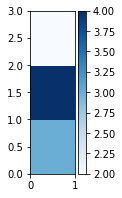

In [46]:
plt.figure(figsize=(1, 3))
frequencies = som.activation_response(np_df_train)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()

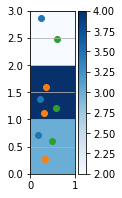

In [47]:
w_x, w_y = zip(*[som.winner(d) for d in np_df_train])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(1, 3))
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()

for c in np.unique(etiquetas):
    idx_target = etiquetas==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, )

plt.grid()
plt.show()

In [48]:
#Creando el set de datos de prueba
df_test = pd.DataFrame()
df_test["calle"] = signalTest_Calle
df_test["Fiesta"] = signalTest_Fiesta
df_test["Lluvia"] = signalTest_Lluvia

In [49]:
df_test.head()

,calle,Fiesta,Lluvia
0,2204,3650,797
1,2496,3816,919
2,2737,3953,880
3,2963,4071,388
4,3246,4092,106


In [50]:
#Obteniendo transpuesta
df_test_t = df_test.T
df_test_t.head(10)

,0,1,2,3,4,5,6,7,8,9,...,661490,661491,661492,661493,661494,661495,661496,661497,661498,661499
calle,2204,2496,2737,2963,3246,3552,3845,3999,4146,4315,...,2518,2691,2917,3170,3514,3702,3674,3786,4036,4351
Fiesta,3650,3816,3953,4071,4092,4018,3931,3811,3645,3479,...,239,150,61,20,-50,-186,-300,-359,-418,-450
Lluvia,797,919,880,388,106,104,328,1199,1868,1167,...,-1629,-946,-1439,-2035,-2174,-2223,-2278,-2367,-2612,-2488


In [51]:
#Normalizando el dataframe
df_test_norm=((df_test_t-df_test_t.min())/(df_test_t.max()-df_test_t.min()))*20
df_test_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,661490,661491,661492,661493,661494,661495,661496,661497,661498,661499
calle,9.863302,10.887125,12.08591,13.983166,15.755143,17.618804,19.52262,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
Fiesta,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.00000,18.657143,15.601405,14.688691,...,9.008922,6.026945,6.887052,7.896254,7.468354,6.875949,6.646505,6.526897,6.600481,5.959936
Lluvia,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [52]:
#Convirtiendo el dataframe a un arreglo de numpy ya que el proceso de minisom me enviaba errores al usar el df
np_df_test = df_test_norm.to_numpy()

In [53]:
y_test = [0, 1, 2]

In [54]:
class_assignments = som.labels_map(np_df_train, etiquetas)

In [55]:
def classify(som, data, class_assignments):
    winmap = class_assignments
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [56]:
from sklearn.metrics import classification_report

In [57]:
#Ejecutando las métricas
print(classification_report(y_test, classify(som, np_df_test, class_assignments)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.33      1.00      0.50         1
           2       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
